# What's most welcome language among developer based on the stackoverflow survey data

### 1. Business understanding
For this reseaching, we will draw our insight based on Stack overflow survey data 2018-2020, 3 main below questions need to be tackle :
1. What's most pouplar language that among last 3 year?
2. What's rapid growing language that among last 3 year?
3. What's depreciated langauge that among last 3 year?

### 2. Data understanding

In [1]:
# import necessary package
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Gather 3 years data
data_2018=pd.read_csv("2018.csv",low_memory=False)
data_2019=pd.read_csv("2019.csv",low_memory=False)
data_2020=pd.read_csv("2020.csv",low_memory=False)

In [3]:
# Comine data together
data_2020['collected_year']=2020
data_2019['collected_year']=2019
data_2018['collected_year']=2018

data=data_2020[['LanguageWorkedWith','collected_year']].append(data_2019[['LanguageWorkedWith','collected_year']],ignore_index=True)
data=data.append(data_2018[['LanguageWorkedWith','collected_year']],ignore_index=True)

In [4]:
data.shape

(252199, 2)

In [5]:
data.head()

,LanguageWorkedWith,collected_year
0,C#;HTML/CSS;JavaScript,2020
1,JavaScript;Swift,2020
2,Objective-C;Python;Swift,2020
3,NaN,2020
4,HTML/CSS;Ruby;SQL,2020


In [6]:
data.loc[(data['collected_year']==2020),'LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                  1073
HTML/CSS;JavaScript                                                           900
C#;HTML/CSS;JavaScript;SQL                                                    856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                         754
HTML/CSS;JavaScript;TypeScript                                                697
                                                                             ... 
Assembly;C;HTML/CSS;JavaScript;PHP;Python;R;SQL                                 1
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Objective-C;R;SQL;TypeScript       1
C;C++;Go;HTML/CSS;JavaScript;Objective-C;PHP;Python;Ruby;SQL;Swift              1
Bash/Shell/PowerShell;C++;Go;Java;Python;Rust                                   1
Assembly;C++;HTML/CSS;Java                                                      1
Name: LanguageWorkedWith, Length: 14256, dtype: int64

In [7]:
pd.DataFrame(data.loc[(data['collected_year']==2020),'LanguageWorkedWith'].str.split(';'))

,LanguageWorkedWith
0,"[C#, HTML/CSS, JavaScript]"
1,"[JavaScript, Swift]"
2,"[Objective-C, Python, Swift]"
3,NaN
4,"[HTML/CSS, Ruby, SQL]"
...,...
64456,NaN
64457,"[Assembly, Bash/Shell/PowerShell, C, C#, C++, ..."
64458,NaN
64459,[HTML/CSS]


#### It seems most of input data are combined serveral selection

### 3. Data preparation & Data modelling

####  Missing date handling

In [8]:
# check missing data
print("total data volumn is {}".format(data.shape[0]))
print("missing data volumn is {}, precentage is {}".format(data['LanguageWorkedWith'].isnull().sum(),data['LanguageWorkedWith'].isnull().sum()/data.shape[0]))

total data volumn is 252199
missing data volumn is 28918, precentage is 0.11466342055281742


it seems that we have ~ 10% user didn't fill in any language data, thereof, we should drop them

In [9]:
#Drop NaN value
data.dropna(subset=['LanguageWorkedWith'],axis=0,inplace=True)

#Check NaN value again
print("total data volumn is {}".format(data.shape[0]))
print("missing data volumn is {}, precentage is {}".format(data['LanguageWorkedWith'].isnull().sum(),data['LanguageWorkedWith'].isnull().sum()/data.shape[0]))

total data volumn is 223281
missing data volumn is 0, precentage is 0.0


#### Data processing pipeline

In [10]:
#define Text split function 
def split(raw,column='LanguageWorkedWith'):
    '''
    Input:
    raw - raw input data
    column - the column you want to split by "/"
    Output:
    new_raw - processed data after being split
    '''   
    new_raw=raw.copy()
    new_raw[column]=raw[column].str.split(';')
    return new_raw


In [11]:
#define language_count function
def count_language(raw,result_dict,count_year,column='LanguageWorkedWith'):  
    '''
    Input:
    raw - raw input data
    result_dict - the dict you want to inhereit
    count_year - the input year
    column - the column contain the language
    Output:
    result_dict - processed data after langauge being counted
    '''
    for i in split(raw[raw['collected_year']==count_year])[column]:
        for j in i:
            if (j,count_year) in result_dict.keys():
                result_dict[j,count_year]+=1
            else:
                result_dict[j,count_year]=1
    return result_dict


In [12]:
#define percent function:
def _percent(raw): 
    '''
    transoform from number into %
    '''
    new=raw.copy()
    for i,j in new.keys():
        if j ==2020:
            new[i,j]/=data_2020.shape[0]
        elif j==2019:
            new[i,j]/=data_2019.shape[0]
        else:
            new[i,j]/=data_2018.shape[0]

    return new

In [13]:
# comibe 3 years data into one dict
language_perc={}
for year in [2018,2019,2020]:
    language_perc.update(_percent(count_language(data,{},year)))

# a galance at combined data
new_data=pd.DataFrame(language_perc,index=['%']).T
new_data.head()

,,%
JavaScript,2018,0.553194
Python,2018,0.307106
HTML,2018,0.542492
CSS,2018,0.515695
Bash/Shell,2018,0.315331


In [14]:
# Define assert function to check data consistence
def assert_column(data,column_name,year):
    try:
        data[(column_name,year)]
        #print('Column {},{} is exist'.format(column_name,year))
    except:
        print('Column {},{} is not exist'.format(column_name,year))
         

In [15]:
# collect all the language from 2018 to 2020
Language_all=[]
for i,j in language_perc.keys():
    Language_all.append(i)
Language_all=list(set(Language_all))
print(Language_all)

['Go', 'Ruby', 'Cobol', 'JavaScript', 'Visual Basic 6', 'TypeScript', 'Java', 'F#', 'VBA', 'HTML/CSS', 'Assembly', 'Bash/Shell/PowerShell', 'CSS', 'CoffeeScript', 'Kotlin', 'Matlab', 'Scala', 'Hack', 'Groovy', 'HTML', 'Objective-C', 'Rust', 'C#', 'Clojure', 'WebAssembly', 'Dart', 'C++', 'Delphi/Object Pascal', 'R', 'PHP', 'Erlang', 'Lua', 'C', 'Bash/Shell', 'Perl', 'Ocaml', 'Julia', 'Haskell', 'Other(s):', 'SQL', 'Elixir', 'Swift', 'Python', 'VB.NET']


In [16]:
# check data inconsitence
for year in [2018,2019,2020]:
    for language in Language_all:
        assert_column(language_perc,language,year)

Column HTML/CSS,2018 is not exist
Column Bash/Shell/PowerShell,2018 is not exist
Column WebAssembly,2018 is not exist
Column Dart,2018 is not exist
Column Other(s):,2018 is not exist
Column Elixir,2018 is not exist
Column Cobol,2019 is not exist
Column Visual Basic 6,2019 is not exist
Column CSS,2019 is not exist
Column CoffeeScript,2019 is not exist
Column Matlab,2019 is not exist
Column Hack,2019 is not exist
Column Groovy,2019 is not exist
Column HTML,2019 is not exist
Column Delphi/Object Pascal,2019 is not exist
Column Lua,2019 is not exist
Column Bash/Shell,2019 is not exist
Column Perl,2019 is not exist
Column Ocaml,2019 is not exist
Column Julia,2019 is not exist
Column Haskell,2019 is not exist
Column VB.NET,2019 is not exist
Column Cobol,2020 is not exist
Column Visual Basic 6,2020 is not exist
Column F#,2020 is not exist
Column CSS,2020 is not exist
Column CoffeeScript,2020 is not exist
Column Matlab,2020 is not exist
Column Hack,2020 is not exist
Column Groovy,2020 is not e

A lot missing column exist 

<AxesSubplot:>

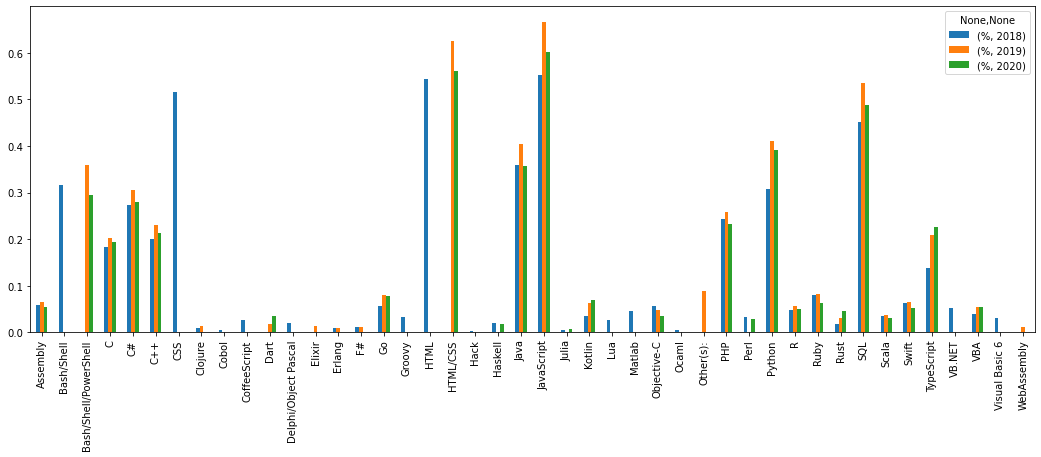

In [17]:
# Data visualize
new_data.unstack().plot(kind='bar',figsize=(18,6))

It seems that data is not consistent year by year, possible reason is :
1. Missing user data input from stakeoverflow user survey
2. New emerging language come into place that does not exist before, e.g WebAssembly/Draft/etc.
3. Language is really depreciated over the year, thereof, Stakeoverflow has no interest to collect e.g Visual Basic 6/VB.Net/ Ocaml/HACK/etc.
4. New language & old lanaguage , e.g Bash/shell has changed the name into Bash/Shell/PowerShell since 2019, possible reason is PowerShell come into popular starting from 2019
5. Combining multiple language together, e.g HTML and CSS will counted seprately in 2018,while in 2019/2020, combined together. Possible reason is HTML/CSS is usually the skills connected each other firmly to setup Web

We will correct issue : one for Bash/Shell/PowerShell ,one for HTML/CSS

In [18]:
language_perc[('Bash/Shell/PowerShell',2018)]=language_perc.pop(('Bash/Shell',2018))
language_perc[('HTML/CSS',2018)]=0.5*(language_perc.pop(('HTML',2018)) + language_perc.pop(('CSS',2018)))

<AxesSubplot:>

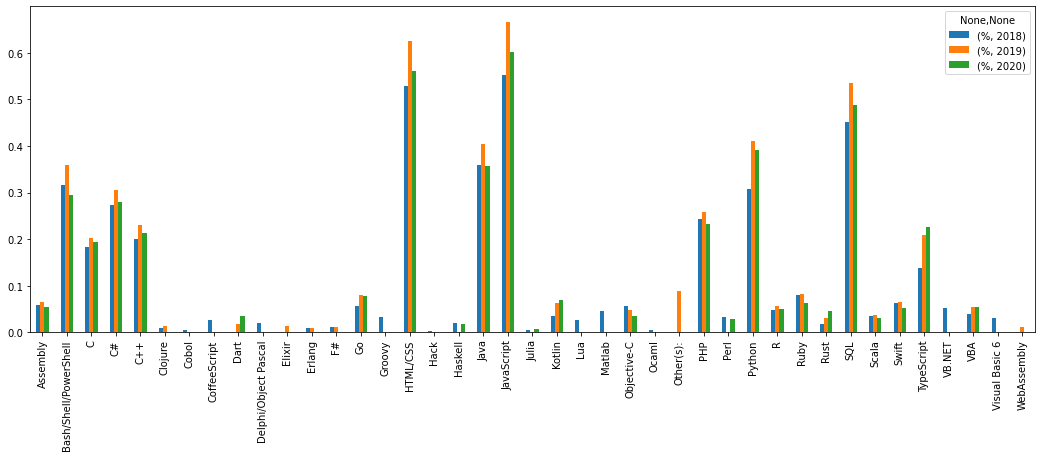

In [19]:
# Data visualize
corrected_data=pd.DataFrame(language_perc,index=['%']).T

corrected_data.unstack().plot(kind='bar',figsize=(18,6))

### Data analyse & Modelling & Evaluation

What's most pouplar language that among last 3 year?

In [20]:
# some certain language data collection doesn't include in the dataset, in order to keep inconsistency of data, we will treat them as number Zero 
df=corrected_data.unstack()
df=df.fillna(0,axis=0)
df.head()

%                    
                           2018      2019      2020
Assembly               0.058267  0.065626  0.055119
Bash/Shell/PowerShell  0.315331  0.359923  0.294442
C                      0.182510  0.202705  0.193714
C#                     0.272662  0.304861  0.279875
C++                    0.201022  0.230910  0.212640

<AxesSubplot:>

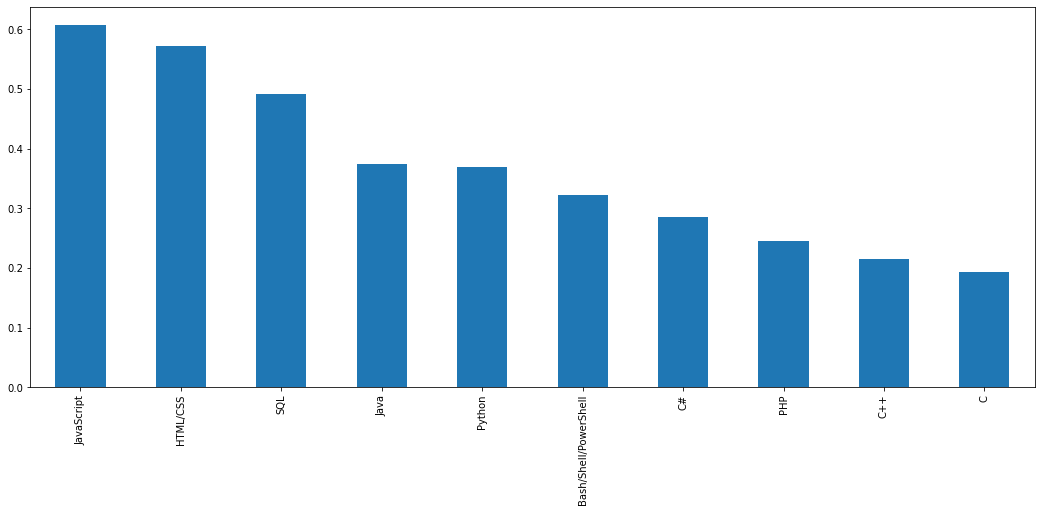

In [21]:
# measure the most popular language by using average voting % from 2018-2020
df['average']=(df[('%', 2018)]+df[('%', 2019)]+df[('%', 2020)])/3
df['average'].sort_values(ascending=False)[:10].plot(kind='bar',figsize=(18,7))

What's most rapidlly language that among last 3 year?

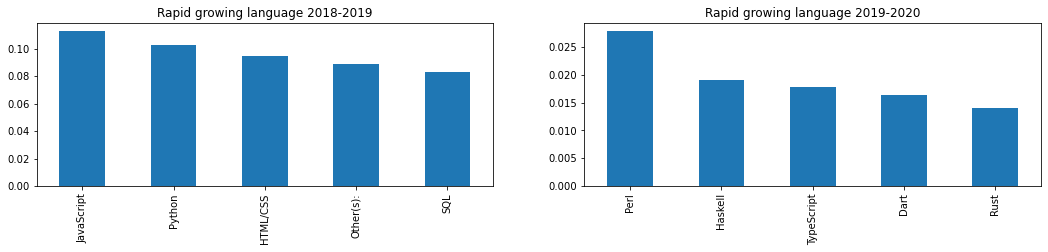

In [22]:
# measure the rapid growing language by voting deviation
plt.subplot(121)
(df[('%', 2019)]-df[('%', 2018)]).sort_values(ascending=False)[:5].plot(kind='bar',title='Rapid growing language 2018-2019',figsize=(18,3))
plt.subplot(122)

(df[('%', 2020)]-df[('%', 2019)]).sort_values(ascending=False)[:5].plot(kind='bar',title='Rapid growing language 2019-2020',figsize=(18,3))
plt.show()

What's depreciated langauge that among last 3 year?

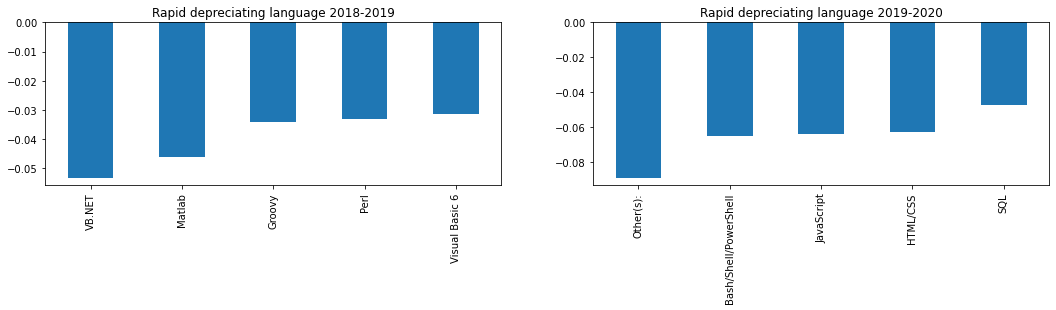

In [23]:
plt.subplot(121)
(df[('%', 2019)]-df[('%', 2018)]).sort_values(ascending=True)[:5].plot(kind='bar',title='Rapid depreciating language 2018-2019',figsize=(18,3))
plt.subplot(122)

(df[('%', 2020)]-df[('%', 2019)]).sort_values(ascending=True)[:5].plot(kind='bar',title='Rapid depreciating language 2019-2020',figsize=(18,3))
plt.show()

### Conclusion


#### From analyising the Stackoverflow survey data 2018-2020, we can draw our conclusion as below:
1. What's most pouplar language that among last 3 year?
JS HTML/CSS ranked as Top 3 implies that WEB development is quite popular these year while SQL/Java/Python/Bash/Shell/PowerShell/C#/C/PHP/C++ takes following
2. What's rapid growing language that among last 3 year?
In 2019, it seems JS, Python,HTML/CSS ,SQL grows faster than others while in 2020, Perl,HASKshell,Typescript,draft,Rust grows faster
3. What's depreciated langauge that among last 3 year?
In 2019, it seems Vb.Net, Matlab ,Groovy , perl, VB6 depreciated hugely than others while in 2020,Bash/Shell/PowerShell, JS,HTML/CSS,SQL depreciated more